In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv(r'C:\Users\user\Desktop\data-science-journey\jupyter notebooks files\messy_sales.csv')
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,January 15 2024,north,tablet,electronics,32,USD 858,########,10%
1,1/30/2024,north,Tablet,Electronics,72,$833.83,########,15 percent
2,2/13/2024,EAST,laptop,ELEC,NaN,489.12,NaN,0.08
3,4/28/2024,West,Laptop,gadget,thirty,$733.46,########,0.1
4,2/18/2024,EAST,Phone,ELEC,47,USD 373,"40,920",0.1
...,...,...,...,...,...,...,...,...
195,March 15 2024,NORTH,Tablet,ELEC,twenty,USD 702,23607,10%
196,2/23/2024,north,Laptop,ELEC,twenty,566.26,"29,715",15 percent
197,2/10/2024,north,Desktop,Electronics,91,$123.43,"12,432",0.1
198,3/12/2024,West,Phone,ELEC,thirty,755.84,41246,0.08


In [6]:
# check for duplicate
# from this i know that there is no duplicate in this dataset
sales.duplicated().sum()

np.int64(0)

In [7]:
# check the null values
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               200 non-null    object
 1   Region             200 non-null    object
 2   Product            200 non-null    object
 3   Category           200 non-null    object
 4   Units Sold         196 non-null    object
 5   Unit Price         200 non-null    object
 6   Total Sales        197 non-null    object
 7   Profit Margin (%)  200 non-null    object
dtypes: object(8)
memory usage: 12.6+ KB


In [8]:
# sum of nuls 
# we have 7 null values on the 2 different columns

sales.isnull().sum()

Date                 0
Region               0
Product              0
Category             0
Units Sold           4
Unit Price           0
Total Sales          3
Profit Margin (%)    0
dtype: int64

In [9]:
# check the unique values on the units sold column

sales['Units Sold'].unique()

array(['32', '72', nan, 'thirty', '47', 'twenty', '29', '60', '8', '28',
       '43', '35', '34', '87', '59', '93', '24', '73', '91', '39', '21',
       '36', '7', '63', '83', '96', '19', '51', '15', '27', '48', '52',
       '77', '56', '10', '57', '37', '95', '18', '71', '69', '13', '94',
       '99', '42', '64', '61', '45', '100', '70'], dtype=object)

In [10]:
# replace thirty and twenty with the actual figures that is 30 and 20 respectively

sales['Units Sold'] = sales['Units Sold'].replace({'twenty': 20, 'thirty': 30})
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,January 15 2024,north,tablet,electronics,32,USD 858,########,10%
1,1/30/2024,north,Tablet,Electronics,72,$833.83,########,15 percent
2,2/13/2024,EAST,laptop,ELEC,NaN,489.12,NaN,0.08
3,4/28/2024,West,Laptop,gadget,30,$733.46,########,0.1
4,2/18/2024,EAST,Phone,ELEC,47,USD 373,"40,920",0.1
...,...,...,...,...,...,...,...,...
195,March 15 2024,NORTH,Tablet,ELEC,20,USD 702,23607,10%
196,2/23/2024,north,Laptop,ELEC,20,566.26,"29,715",15 percent
197,2/10/2024,north,Desktop,Electronics,91,$123.43,"12,432",0.1
198,3/12/2024,West,Phone,ELEC,30,755.84,41246,0.08


In [11]:
# recheck the unique values 
sales['Units Sold'].unique()

array(['32', '72', nan, 30, '47', 20, '29', '60', '8', '28', '43', '35',
       '34', '87', '59', '93', '24', '73', '91', '39', '21', '36', '7',
       '63', '83', '96', '19', '51', '15', '27', '48', '52', '77', '56',
       '10', '57', '37', '95', '18', '71', '69', '13', '94', '99', '42',
       '64', '61', '45', '100', '70'], dtype=object)

In [12]:
# convert the units sold to numeric

sales['Units Sold'] = pd.to_numeric(sales['Units Sold'], errors = 'coerce')
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,January 15 2024,north,tablet,electronics,32.0,USD 858,########,10%
1,1/30/2024,north,Tablet,Electronics,72.0,$833.83,########,15 percent
2,2/13/2024,EAST,laptop,ELEC,NaN,489.12,NaN,0.08
3,4/28/2024,West,Laptop,gadget,30.0,$733.46,########,0.1
4,2/18/2024,EAST,Phone,ELEC,47.0,USD 373,"40,920",0.1
...,...,...,...,...,...,...,...,...
195,March 15 2024,NORTH,Tablet,ELEC,20.0,USD 702,23607,10%
196,2/23/2024,north,Laptop,ELEC,20.0,566.26,"29,715",15 percent
197,2/10/2024,north,Desktop,Electronics,91.0,$123.43,"12,432",0.1
198,3/12/2024,West,Phone,ELEC,30.0,755.84,41246,0.08


In [13]:
sales['Units Sold'].dtype

dtype('float64')

In [14]:
# fill the missing values on the 'Units Sold' column

sales['Units Sold'] = sales['Units Sold'].fillna(sales['Units Sold'].mean()).round(1)
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,January 15 2024,north,tablet,electronics,32.0,USD 858,########,10%
1,1/30/2024,north,Tablet,Electronics,72.0,$833.83,########,15 percent
2,2/13/2024,EAST,laptop,ELEC,34.2,489.12,NaN,0.08
3,4/28/2024,West,Laptop,gadget,30.0,$733.46,########,0.1
4,2/18/2024,EAST,Phone,ELEC,47.0,USD 373,"40,920",0.1
...,...,...,...,...,...,...,...,...
195,March 15 2024,NORTH,Tablet,ELEC,20.0,USD 702,23607,10%
196,2/23/2024,north,Laptop,ELEC,20.0,566.26,"29,715",15 percent
197,2/10/2024,north,Desktop,Electronics,91.0,$123.43,"12,432",0.1
198,3/12/2024,West,Phone,ELEC,30.0,755.84,41246,0.08


In [15]:
sales['Units Sold'].isnull().sum()

np.int64(0)

In [16]:
# look at total sales column for null values and clean it up

sales['Total Sales'].unique()

array(['########', nan, '40,920', '3103', '37,789', '11,484', '18,486',
       '20,558', '35581', '7352', '48,874', '32,246', '45,019', '5508',
       '14,767', '12754', '14079', '45532', '34516', '29,173', '44,506',
       '42,272', '46,607', '41,150', '32,758', '11,014', '38728', '25846',
       '2,335', '7678', '1829', '32686', '23046', '16817', '46336',
       '35382', '9,275', '15,790', '18,343', '19881', '33798', '18,662',
       '22,040', '22186', '4382', '1896', '31947', '18509', '31768',
       '6,175', '45,407', '25,993', '49835', '7,367', '9661', '15,785',
       '25,970', '20804', '46644', '30143', '2034', '15,519', '30,734',
       '28,262', '49,797', '19,850', '47052', '25654', '6346', '45465',
       '49630', '7737', '37,994', '4,431', '47,060', '16,335', '11506',
       '47238', '10409', '7,793', '5,135', '43395', '46355', '44314',
       '5,917', '16,466', '35698', '15,062', '10101', '35451', '12925',
       '13,864', '48,227', '33,639', '38859', '20,610', '28298', '12

In [17]:
sales['Total Sales']

0      ########
1      ########
2           NaN
3      ########
4        40,920
         ...   
195       23607
196      29,715
197      12,432
198       41246
199    ########
Name: Total Sales, Length: 200, dtype: object

In [22]:
# because pyton see , as string, if convert to string we will have more NaN values so we as we are vonverting to numeric 
# we also replave the , with empty space.

sales['Total Sales'] = pd.to_numeric(sales['Total Sales'].str.replace(',', ''), errors = 'coerce')
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,January 15 2024,north,tablet,electronics,32.0,USD 858,NaN,10%
1,1/30/2024,north,Tablet,Electronics,72.0,$833.83,NaN,15 percent
2,2/13/2024,EAST,laptop,ELEC,34.2,489.12,NaN,0.08
3,4/28/2024,West,Laptop,gadget,30.0,$733.46,NaN,0.1
4,2/18/2024,EAST,Phone,ELEC,47.0,USD 373,40920.0,0.1
...,...,...,...,...,...,...,...,...
195,March 15 2024,NORTH,Tablet,ELEC,20.0,USD 702,23607.0,10%
196,2/23/2024,north,Laptop,ELEC,20.0,566.26,29715.0,15 percent
197,2/10/2024,north,Desktop,Electronics,91.0,$123.43,12432.0,0.1
198,3/12/2024,West,Phone,ELEC,30.0,755.84,41246.0,0.08


In [25]:
sales[sales['Total Sales'].isnull()]

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,January 15 2024,north,tablet,electronics,32.0,USD 858,NaN,10%
1,1/30/2024,north,Tablet,Electronics,72.0,$833.83,NaN,15 percent
2,2/13/2024,EAST,laptop,ELEC,34.2,489.12,NaN,0.08
3,4/28/2024,West,Laptop,gadget,30.0,$733.46,NaN,0.1
10,January 26 2024,South,Desktop,ELEC,34.2,$100.76,NaN,0.08
...,...,...,...,...,...,...,...,...
180,2/21/2024,West,Phone,gadget,61.0,819.21,NaN,0.08
183,April 02 2024,north,Tablet,ELEC,45.0,USD 448,NaN,15 percent
184,4/10/2024,West,Phone,ELEC,30.0,USD 699,NaN,15 percent
193,March 05 2024,NORTH,Phone,gadget,20.0,$818.68,NaN,15 percent


In [29]:
# replace the null values in the total sales column with the mean

sales['Total Sales'] = sales['Total Sales'].fillna(sales['Total Sales'].mean()).round(0)
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,January 15 2024,north,tablet,electronics,32.0,USD 858,26014.0,10%
1,1/30/2024,north,Tablet,Electronics,72.0,$833.83,26014.0,15 percent
2,2/13/2024,EAST,laptop,ELEC,34.2,489.12,26014.0,0.08
3,4/28/2024,West,Laptop,gadget,30.0,$733.46,26014.0,0.1
4,2/18/2024,EAST,Phone,ELEC,47.0,USD 373,40920.0,0.1
...,...,...,...,...,...,...,...,...
195,March 15 2024,NORTH,Tablet,ELEC,20.0,USD 702,23607.0,10%
196,2/23/2024,north,Laptop,ELEC,20.0,566.26,29715.0,15 percent
197,2/10/2024,north,Desktop,Electronics,91.0,$123.43,12432.0,0.1
198,3/12/2024,West,Phone,ELEC,30.0,755.84,41246.0,0.08


In [34]:
sales['Total Sales'].isnull().sum()

np.int64(0)

In [35]:
# clean column name that is remove white spaces

sales.columns = sales.columns.str.strip()
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,January 15 2024,north,tablet,electronics,32.0,USD 858,26014.0,10%
1,1/30/2024,north,Tablet,Electronics,72.0,$833.83,26014.0,15 percent
2,2/13/2024,EAST,laptop,ELEC,34.2,489.12,26014.0,0.08
3,4/28/2024,West,Laptop,gadget,30.0,$733.46,26014.0,0.1
4,2/18/2024,EAST,Phone,ELEC,47.0,USD 373,40920.0,0.1
...,...,...,...,...,...,...,...,...
195,March 15 2024,NORTH,Tablet,ELEC,20.0,USD 702,23607.0,10%
196,2/23/2024,north,Laptop,ELEC,20.0,566.26,29715.0,15 percent
197,2/10/2024,north,Desktop,Electronics,91.0,$123.43,12432.0,0.1
198,3/12/2024,West,Phone,ELEC,30.0,755.84,41246.0,0.08


In [42]:
# # standardize the region, product and category column 

sales['Region'] = sales['Region'].str.lower().str.title()
sales['Product'] = sales['Product'].str.lower().str.title()
sales['Category'] = sales['Category'].str.lower().str.title()
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,January 15 2024,North,Tablet,Electronics,32.0,USD 858,26014.0,10%
1,1/30/2024,North,Tablet,Electronics,72.0,$833.83,26014.0,15 percent
2,2/13/2024,East,Laptop,Elec,34.2,489.12,26014.0,0.08
3,4/28/2024,West,Laptop,Gadget,30.0,$733.46,26014.0,0.1
4,2/18/2024,East,Phone,Elec,47.0,USD 373,40920.0,0.1
...,...,...,...,...,...,...,...,...
195,March 15 2024,North,Tablet,Elec,20.0,USD 702,23607.0,10%
196,2/23/2024,North,Laptop,Elec,20.0,566.26,29715.0,15 percent
197,2/10/2024,North,Desktop,Electronics,91.0,$123.43,12432.0,0.1
198,3/12/2024,West,Phone,Elec,30.0,755.84,41246.0,0.08


In [49]:
sales['Category'].unique()

array(['Electronics', 'Gadgets'], dtype=object)

In [48]:
# correct the spellings and unify the category

sales['Category'] = sales['Category'].replace({'Elec': 'Electronics', 'Gadget': 'Gadgets'})
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,January 15 2024,North,Tablet,Electronics,32.0,USD 858,26014.0,10%
1,1/30/2024,North,Tablet,Electronics,72.0,$833.83,26014.0,15 percent
2,2/13/2024,East,Laptop,Electronics,34.2,489.12,26014.0,0.08
3,4/28/2024,West,Laptop,Gadgets,30.0,$733.46,26014.0,0.1
4,2/18/2024,East,Phone,Electronics,47.0,USD 373,40920.0,0.1
...,...,...,...,...,...,...,...,...
195,March 15 2024,North,Tablet,Electronics,20.0,USD 702,23607.0,10%
196,2/23/2024,North,Laptop,Electronics,20.0,566.26,29715.0,15 percent
197,2/10/2024,North,Desktop,Electronics,91.0,$123.43,12432.0,0.1
198,3/12/2024,West,Phone,Electronics,30.0,755.84,41246.0,0.08


In [51]:
sales['Region'].unique()

array(['North', 'East', 'West', 'South'], dtype=object)

In [52]:
sales['Product'].unique()

array(['Tablet', 'Laptop', 'Phone', 'Desktop', 'Monitor'], dtype=object)

In [20]:
# look at the date column

sales['Date'].unique()

array(['January 15 2024', '1/30/2024', '2/13/2024', '4/28/2024',
       '2/18/2024', 'April 03 2024', '1/28/2024', 'March 15 2024',
       'January 09 2024', '2/7/2024', 'January 26 2024', '1/11/2024',
       'April 06 2024', '3/16/2024', 'March 03 2024', '2/22/2024',
       '1/18/2024', '3/3/2024', '1/8/2024', '2/23/2024', '2/10/2024',
       '2/26/2024', 'January 20 2024', '4/16/2024', 'April 25 2024',
       'January 14 2024', 'April 20 2024', '1/29/2024', '4/22/2024',
       '2/2/2024', '3/20/2024', 'April 30 2024', 'February 11 2024',
       '1/12/2024', 'March 30 2024', '3/12/2024', '2/8/2024', '3/26/2024',
       'February 24 2024', '3/1/2024', '1/17/2024', '3/15/2024',
       'April 13 2024', '2/16/2024', 'February 04 2024', 'April 07 2024',
       'February 17 2024', '4/21/2024', 'March 28 2024', '4/26/2024',
       '1/31/2024', '1/10/2024', '4/11/2024', '3/17/2024', '2/12/2024',
       '3/25/2024', '4/17/2024', '2/19/2024', '3/14/2024',
       'February 12 2024', 'February 20

In [56]:
sales['Date']

0      January 15 2024
1            1/30/2024
2            2/13/2024
3            4/28/2024
4            2/18/2024
            ...       
195      March 15 2024
196          2/23/2024
197          2/10/2024
198          3/12/2024
199          2/19/2024
Name: Date, Length: 200, dtype: object

In [61]:
# standardize the date column to be uniform
# converted to datetime 

sales['Date'] = pd.to_datetime(sales['Date'], format = 'mixed', errors = 'ignore')
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,2024-01-15,North,Tablet,Electronics,32.0,USD 858,26014.0,10%
1,2024-01-30,North,Tablet,Electronics,72.0,$833.83,26014.0,15 percent
2,2024-02-13,East,Laptop,Electronics,34.2,489.12,26014.0,0.08
3,2024-04-28,West,Laptop,Gadgets,30.0,$733.46,26014.0,0.1
4,2024-02-18,East,Phone,Electronics,47.0,USD 373,40920.0,0.1
...,...,...,...,...,...,...,...,...
195,2024-03-15,North,Tablet,Electronics,20.0,USD 702,23607.0,10%
196,2024-02-23,North,Laptop,Electronics,20.0,566.26,29715.0,15 percent
197,2024-02-10,North,Desktop,Electronics,91.0,$123.43,12432.0,0.1
198,2024-03-12,West,Phone,Electronics,30.0,755.84,41246.0,0.08


In [64]:
# converted from datetime to just date

sales['Date'] = sales['Date'].dt.date
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,2024-01-15,North,Tablet,Electronics,32.0,USD 858,26014.0,10%
1,2024-01-30,North,Tablet,Electronics,72.0,$833.83,26014.0,15 percent
2,2024-02-13,East,Laptop,Electronics,34.2,489.12,26014.0,0.08
3,2024-04-28,West,Laptop,Gadgets,30.0,$733.46,26014.0,0.1
4,2024-02-18,East,Phone,Electronics,47.0,USD 373,40920.0,0.1
...,...,...,...,...,...,...,...,...
195,2024-03-15,North,Tablet,Electronics,20.0,USD 702,23607.0,10%
196,2024-02-23,North,Laptop,Electronics,20.0,566.26,29715.0,15 percent
197,2024-02-10,North,Desktop,Electronics,91.0,$123.43,12432.0,0.1
198,2024-03-12,West,Phone,Electronics,30.0,755.84,41246.0,0.08


In [88]:
# converted the date column back to datetime for future purposes

sales['Date'] = pd.to_datetime(sales['Date'])
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,2024-01-15,North,Tablet,Electronics,32.0,USD 858,26014.0,0.10
1,2024-01-30,North,Tablet,Electronics,72.0,$833.83,26014.0,0.15
2,2024-02-13,East,Laptop,Electronics,34.2,489.12,26014.0,0.08
3,2024-04-28,West,Laptop,Gadgets,30.0,$733.46,26014.0,0.10
4,2024-02-18,East,Phone,Electronics,47.0,USD 373,40920.0,0.10
...,...,...,...,...,...,...,...,...
195,2024-03-15,North,Tablet,Electronics,20.0,USD 702,23607.0,0.10
196,2024-02-23,North,Laptop,Electronics,20.0,566.26,29715.0,0.15
197,2024-02-10,North,Desktop,Electronics,91.0,$123.43,12432.0,0.10
198,2024-03-12,West,Phone,Electronics,30.0,755.84,41246.0,0.08


In [89]:
sales['Date'].dtype

dtype('<M8[ns]')

In [70]:
# look at the Profit Margin (%)

sales['Profit Margin (%)'].unique()

array(['10%', '15 percent', '0.08', '0.1', '8 percent', '12%'],
      dtype=object)

In [76]:
# the Profit Margin (%) column properly formatted and now uniform

sales['Profit Margin (%)'] = sales['Profit Margin (%)'].replace({'10%': 0.1, '15 percent': 0.15, '0.08': 0.08, '0.1': 0.1, '8 percent': 0.08, '12%': 0.12})
sales

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,2024-01-15,North,Tablet,Electronics,32.0,USD 858,26014.0,0.10
1,2024-01-30,North,Tablet,Electronics,72.0,$833.83,26014.0,0.15
2,2024-02-13,East,Laptop,Electronics,34.2,489.12,26014.0,0.08
3,2024-04-28,West,Laptop,Gadgets,30.0,$733.46,26014.0,0.10
4,2024-02-18,East,Phone,Electronics,47.0,USD 373,40920.0,0.10
...,...,...,...,...,...,...,...,...
195,2024-03-15,North,Tablet,Electronics,20.0,USD 702,23607.0,0.10
196,2024-02-23,North,Laptop,Electronics,20.0,566.26,29715.0,0.15
197,2024-02-10,North,Desktop,Electronics,91.0,$123.43,12432.0,0.10
198,2024-03-12,West,Phone,Electronics,30.0,755.84,41246.0,0.08


In [75]:
sales['Profit Margin (%)'].dtype

dtype('float64')

In [78]:
sales.to_csv('clean_messy_data.csv')

Analysis on the clean messy data

In [95]:
# to get the total sale per region
# total sale per category
# totral sales per products
# total sales per year

In [98]:
# total sales made in the year 2024

sales.groupby(sales['Date'].dt.year).sum(numeric_only = True)

,Units Sold,Total Sales,Profit Margin (%)
Date,,,
2024,6846.8,5202819.0,20.65


In [111]:
# total sales per region 

total_sales_reg= sales.groupby('Region')['Total Sales'].sum().sort_values(ascending = False)
total_sales_reg

Region
North    2617501.0
South     901465.0
West      896396.0
East      787457.0
Name: Total Sales, dtype: float64

In [118]:
total_sales_region = total_sales_reg.reset_index()
total_sales_region

,Region,Total Sales
0,North,2617501.0
1,South,901465.0
2,West,896396.0
3,East,787457.0


<Axes: title={'center': 'total sales by region'}, xlabel='Region'>

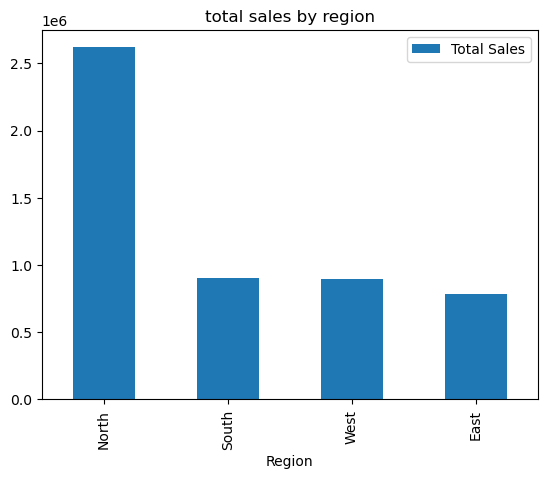

In [120]:
# plot for the total sales per region

total_sales_region.plot(
    x = 'Region',
    y = 'Total Sales',
    title = 'total sales by region',  
    kind = 'bar'
)


In [122]:
# total sales per category

total_sales_category = sales.groupby('Category')['Total Sales'].sum()
total_sales_category

Category
Electronics    3080122.0
Gadgets        2122697.0
Name: Total Sales, dtype: float64

In [124]:
total_sales_cat = total_sales_category.reset_index()
total_sales_cat

,Category,Total Sales
0,Electronics,3080122.0
1,Gadgets,2122697.0


<Axes: title={'center': 'total sales by category'}, xlabel='Category'>

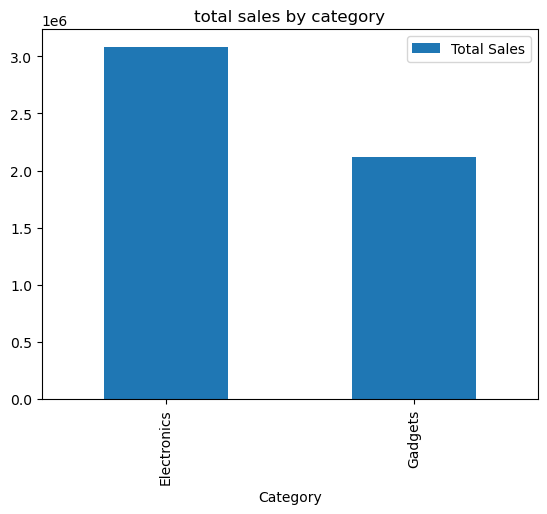

In [125]:
# plot of total sales by category

total_sales_cat.plot(
    x = 'Category',
    y = 'Total Sales',
    kind = 'bar',
    title = 'total sales by category'
)

In [126]:
# total sales per products

total_sales_prod = sales.groupby('Product')['Total Sales'].sum().sort_values(ascending = False)
total_sales_prod

Product
Tablet     1476487.0
Laptop     1403336.0
Phone       865669.0
Monitor     774102.0
Desktop     683225.0
Name: Total Sales, dtype: float64

In [128]:
total_sales_products = total_sales_prod.reset_index()
total_sales_products

,Product,Total Sales
0,Tablet,1476487.0
1,Laptop,1403336.0
2,Phone,865669.0
3,Monitor,774102.0
4,Desktop,683225.0


<Axes: title={'center': 'total sales by products'}, xlabel='Product'>

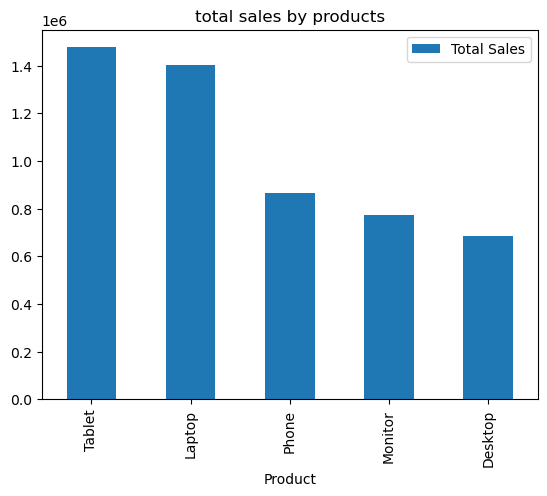

In [129]:
# plot of total sale by products

total_sales_products.plot(
    x = 'Product',
    y = 'Total Sales',
    kind = 'bar',
    title = 'total sales by products'
)

In [151]:
# count product sale based on region

sales_count = sales.groupby(['Region', 'Product']).size().reset_index(name = 'product_count')
sales_count

,Region,Product,product_count
0,East,Desktop,3
1,East,Laptop,9
2,East,Monitor,9
3,East,Phone,4
4,East,Tablet,8
5,North,Desktop,16
6,North,Laptop,22
7,North,Monitor,12
8,North,Phone,16
9,North,Tablet,33


In [153]:
sales_count = sales_count.sort_values(by = 'product_count', ascending = False)
sales_count

,Region,Product,product_count
9,North,Tablet,33
6,North,Laptop,22
5,North,Desktop,16
8,North,Phone,16
16,West,Laptop,13
7,North,Monitor,12
2,East,Monitor,9
1,East,Laptop,9
14,South,Tablet,9
18,West,Phone,9


In [155]:
sales.groupby(["Region", "Product"])["Total Sales"].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)

,Region,Product,Total Sales
9,North,Tablet,893758.0
6,North,Laptop,592257.0
8,North,Phone,414151.0
5,North,Desktop,403570.0
16,West,Laptop,350382.0
7,North,Monitor,313765.0
11,South,Laptop,256036.0
18,West,Phone,251869.0
14,South,Tablet,217120.0
4,East,Tablet,214609.0


# Result of analysis

## North has the highest total sale with a value of 2617501.0 ~ 2.6 million
## the region with the lowest sale is East with a value of 787457.0 ~ 780k

## Electronics has the highest sales
## Tablet has the highest total sales with a value of 1476487.0 ~ 1.4 million
## closely followed by Laptop with 1403336.0 ~ 140k
## and the lowest is Desktop


## tablet laptop, desktop, and phone has high sale quantity in the north
## laptop has good sales count in the west
## monitor has a not so good sale count in the east but can be better

## there is a poor sales count in products like desktop and monitor in the west, 
## poor sales count in desktop o[in the east
## poor sales count in phone in the south]

# Recommendations

## Focus should channeled to the North since it is generating more sales
## pay close attention to the East, west and south as to why sales are low and improve
